In [1]:
# ✈️ Análisis Exploratorio de Datos de Vuelos

In [2]:
# Celda 1: Cargar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Cargar datos
df = pd.read_csv('../data/raw/vuelos.csv', parse_dates=['fecha_salida'])
print(f"✅ Datos cargados: {len(df):,} registros")
print(f"✅ Columnas: {df.columns.tolist()}")

✅ Datos cargados: 50,000 registros
✅ Columnas: ['vuelo_id', 'aerolinea', 'origen', 'origen_lat', 'origen_lon', 'destino', 'destino_lat', 'destino_lon', 'fecha_salida', 'retraso_min', 'duracion_min', 'pasajeros']


In [3]:
# Celda 2: Verificar que los datos se cargaron
print(df.head())
print(f"\nTotal registros: {len(df)}")

  vuelo_id aerolinea origen  origen_lat  origen_lon destino  destino_lat  \
0   IBE446       ANE    BIO       43.30       -2.91     LPA        27.93   
1   DLH664       ANE    SVQ       37.42       -5.89     ALC        38.28   
2   DLH141       RYR    LPA       27.93      -15.39     MAD        40.49   
3   RYR388       RYR    MAD       40.49       -3.57     AGP        36.67   
4   VLG615       ANE    LPA       27.93      -15.39     PMI        39.55   

   destino_lon               fecha_salida  retraso_min  duracion_min  \
0       -15.39 2026-01-30 00:32:00.104289          106            85   
1        -0.56 2026-02-21 19:27:00.104289           -5           103   
2        -3.57 2026-01-27 17:45:00.104289           11           138   
3        -4.50 2026-02-01 11:09:00.104289            8            82   
4         2.73 2026-02-16 05:10:00.104289           -6           141   

   pasajeros  
0         64  
1         88  
2        111  
3         67  
4         96  

Total registros: 50

Top 10 rutas más frecuentes:
ruta
MAD → VLC    607
BIO → LPA    598
AGP → PMI    594
LPA → BIO    588
SVQ → PMI    588
LPA → ALC    587
SVQ → BCN    585
BCN → AGP    585
TFN → SVQ    585
SVQ → AGP    584
Name: count, dtype: int64


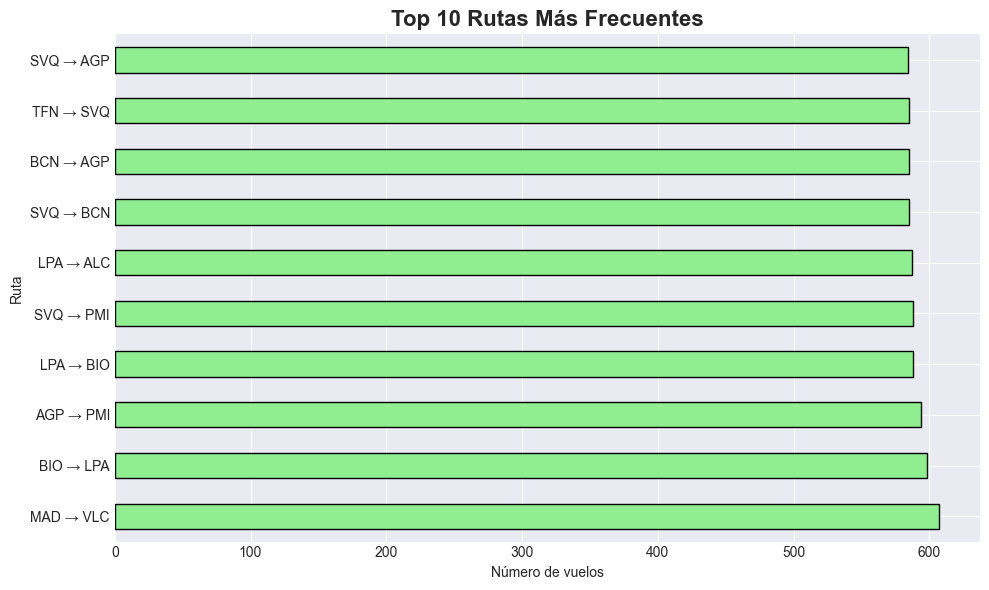

In [4]:
# Celda 3: Análisis de rutas
# Crear columna ruta
df['ruta'] = df['origen'] + ' → ' + df['destino']

# Top 10 rutas
top_rutas = df['ruta'].value_counts().head(10)
print("Top 10 rutas más frecuentes:")
print(top_rutas)

# Gráfico
plt.figure(figsize=(10, 6))
top_rutas.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Top 10 Rutas Más Frecuentes', fontsize=16, fontweight='bold')
plt.xlabel('Número de vuelos')
plt.ylabel('Ruta')
plt.tight_layout()
plt.show()

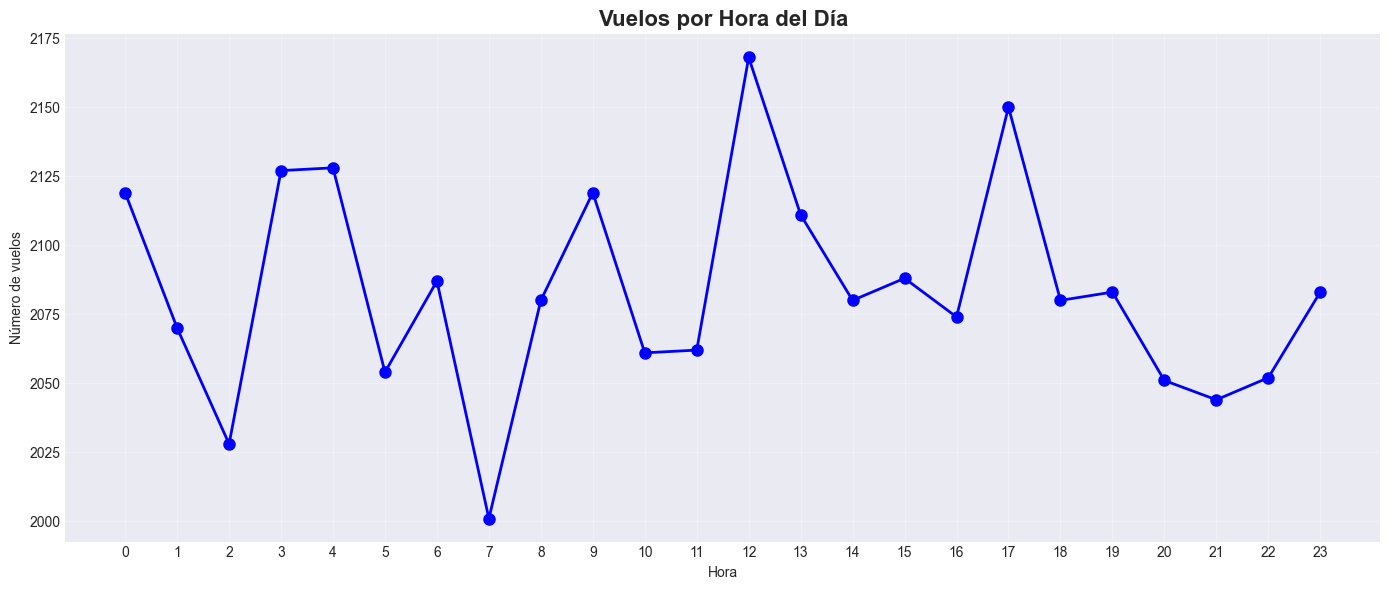

In [5]:
# Celda 4: Análisis por hora
# Crear columna hora
df['hora'] = pd.to_datetime(df['fecha_salida']).dt.hour

# Vuelos por hora
plt.figure(figsize=(14, 6))
hora_counts = df['hora'].value_counts().sort_index()
hora_counts.plot(kind='line', marker='o', linewidth=2, markersize=8, color='blue')
plt.title('Vuelos por Hora del Día', fontsize=16, fontweight='bold')
plt.xlabel('Hora')
plt.ylabel('Número de vuelos')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()